# Flower Detection with Neural Networks 

![](https://www.expatica.com/app/uploads/2018/11/The-meaning-of-flowers-around-the-world-1920x1080.jpg)

# UPVOTE if you like this kernel :)
"This notebook is made with with love ❤️"    -**s_agnik1511**

**In this dataset we are mainly focusing towards how we can build a dataframe from folders of images and classify them with deep neural nets.**

The **first work** in collab notebook is to change the **runtime type to TPU or GPU** for **faster** competion of the project.
You can do it in following steps :

        Click on Runtime --> Change Runtime Type --> Change it to GPU or TPU 

# Steps of making a deep learning model to predict images :


1. Creating environment and downloading data and unzipping
1. Importing required libraries 
2. Understanding the stacks of folders of images to gather their file paths
3. Getting path and primary visualizations
4. Creating dataframes with the images
4. Data preparing to feed into the model
5. Model building
6. Compilation of Model
7. Model Fitting and Evaluation
8. Conclusion and others

# Getting the data :
      There are 3 steps -

                1. Connectiong with kaggle
                2. Downloading data
                3. Unzipping and others

As we are using a **kaggle dataset** to train and perdict we have to use a *docker* to connect kaggle with google collab.

So , we have to upload the API token taken from kaggle ( maybe named as kaggle.json) on the google collab notebook.
and then we have to repeat this 4 lines of code and then we can take the whole data into the collab.

* This lines are used for -
            1. Intsalling the docker.
            2. Connecting it with kaggle directory.
            3. Connecting the unique json for singular accessibility.
            4. Securing access on the notebook.

In [3]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 442M/450M [00:04<00:00, 181MB/s]
100% 450M/450M [00:04<00:00, 97.6MB/s]


As we have linked the kaggle directory we can copy and paste any dataset's API command in the command lines. ( makes sure to write a '!' before pasting the command)

Now the data will be downloaded from kaggle to collab without getting a bypass.

In [5]:
from zipfile import ZipFile
zf = ZipFile('/content/flowers-recognition.zip', 'r')
zf.extractall('/content')
zf.close()

Now the file has been downloaded. But it is in a *.zip* file . So we have to extract the actual file stored in folders.

# Libraries :

     As this is a deep learning task we surely need any deep learning library to start work with . 
     
     In Python we have 2 very famous libraries -   
     1. Tensorflow
     2. Pytorch
     
     For this project we are proceeding with tensorflow.
     
     We also need some supporting libraries which will help us wrangle the data and produce the dataframes and others.
     
     At last but not the least we are importing some libraries to make confusion matrix as this is a problem of multiclass
     classification and which will help us to get a proper explanantion or conclusion of the model or bilogical features.
     

In [6]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow :',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

version of tensorflow : 2.4.0


# Gathering file paths :

We are gathering the file paths and visualizing those images for understanding how to proceed further.

In [7]:
link='/content/flowers/'

In [8]:
import os
for file in os.listdir(link):
    print(link+file)

/content/flowers/flowers
/content/flowers/daisy
/content/flowers/sunflower
/content/flowers/rose
/content/flowers/dandelion
/content/flowers/tulip


There are a total of 5 type of flowers.
     
     1. Daisy
     2. Sunflower
     3. Rose
     4. Dandelion
     5. Tulip
     
So ,now we are going check the daisy flower for better understanding over the datas/images.

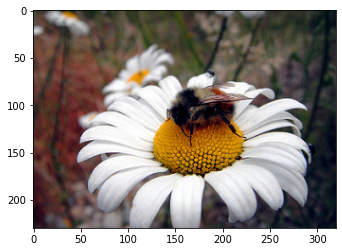

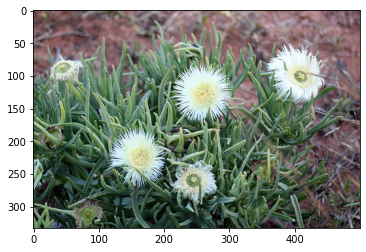

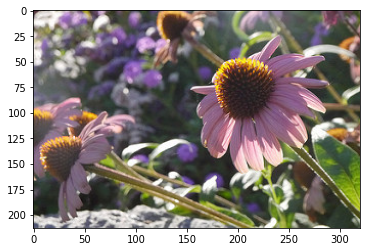

In [10]:
k=0
for fil in os.listdir('/content/flowers/daisy/'):
  link='/content/flowers/daisy/'+fil
  img=mpimg.imread(link)
  plt.imshow(img)
  plt.show()
  k+=1
  if k==3:
    break

We can see that - 
1. Images are **RGB images** so they have three  2d image layers impregnated one over other.
2. The image shape are not synchronized . So, we have to take it in a symmetrical way .
3. The images are very high in resolution and will be a problem to predict faster with even Neural Networks. So we have to boil down the resolution.

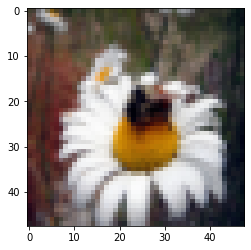

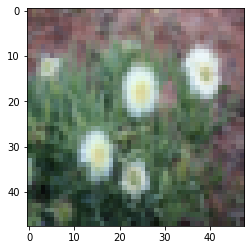

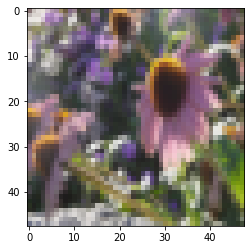

In [11]:
k=0
for fil in os.listdir('/content/flowers/daisy/'):
  link='/content/flowers/daisy/'+fil
  img=mpimg.imread(link)
  img=resize(img,(48,48,3),anti_aliasing=True)
  plt.imshow(img)
  plt.show()
  k+=1
  if k==3:
    break
  

Now we can take the images in these fashion into the dataframe and that will produce a better dataframe.

# Dataframe Generation :
 Now as we have understood on how resolution we are going to take the images , we can produce the dataframe in following manner .
 
 1. Read the images
 2. Resize them into required dimension.
 3. Flatten them to contribute into dataframes.
 4. Create separate dataframes.
 5. Create a general dataframe by concatenation.

In [12]:
# function to create ataframes from the images of a single folder


def create_dataframe(path,arr,label):
   for fil in os.listdir(path):
     link=path+fil
     if link[-3:]=='pyc' or link[-2:]=='py':
       continue
     img=mpimg.imread(link)
     img=resize(img,(48,48,3),anti_aliasing=True)
     img=img.reshape(6912)
     arr.append(img)
   xx=np.ones(len(arr))*label
   arr=pd.DataFrame(arr)
   xx=pd.DataFrame({'label':xx})
   arr=pd.concat([xx,arr],axis=1)
   return arr

Now we are generating the dataframes of every different type of flowers and visualizing them.

In [13]:
daisy=[]
daisy=create_dataframe('/content/flowers/daisy/',daisy,0)


Let's check if that function really returns a dataframe or not !

In [14]:
type(daisy)

pandas.core.frame.DataFrame

Well well ! It works. Let's chcek if it return it in required fashion or not.

In [15]:
daisy.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.0,0.262650,0.252219,0.192402,0.274428,0.247998,0.214461,0.450735,0.442892,0.452042,0.608088,0.619199,0.628350,0.491095,0.457026,0.359191,0.475313,0.345493,0.087078,0.312296,0.253105,0.119703,0.275654,0.238807,0.197426,0.162337,0.171242,0.127764,0.116653,0.167906,0.113657,0.211969,0.251389,0.173162,0.237759,0.261424,0.219553,0.184069,0.223352,0.149088,...,0.238399,0.177601,0.174673,0.221392,0.250967,0.254820,0.287908,0.140972,0.160784,0.176675,0.059722,0.094431,0.121814,0.120193,0.136601,0.163399,0.134150,0.132190,0.184926,0.078105,0.097889,0.152859,0.039624,0.067075,0.122631,0.039216,0.080392,0.114134,0.086275,0.110144,0.161438,0.029003,0.048366,0.118614,0.015686,0.043342,0.105882,0.023870,0.067075,0.105882
1,0.0,0.427854,0.306373,0.304739,0.501838,0.419960,0.356633,0.480612,0.384503,0.380842,0.506005,0.400128,0.404213,0.453385,0.306863,0.299020,0.427328,0.316708,0.319812,0.410825,0.352696,0.360662,0.443627,0.400490,0.402941,0.510049,0.470956,0.494327,0.432123,0.410580,0.396962,0.389338,0.365809,0.322672,0.361770,0.306904,0.258614,0.443714,0.404621,0.375940,...,0.106250,0.130152,0.091993,0.107767,0.230351,0.255111,0.257838,0.274127,0.253922,0.270098,0.226021,0.216136,0.233798,0.282639,0.313894,0.270874,0.208701,0.193137,0.189216,0.203105,0.175557,0.155923,0.207695,0.176225,0.183155,0.225659,0.198284,0.183946,0.223366,0.223524,0.176471,0.176333,0.182435,0.172289,0.316176,0.335784,0.327941,0.237051,0.216299,0.228186
2,0.0,0.530944,0.452288,0.454412,0.793750,0.764645,0.743934,0.884661,0.862234,0.845445,0.908599,0.888991,0.858231,0.821875,0.746752,0.805147,0.699346,0.598999,0.690829,0.643199,0.548019,0.632414,0.611887,0.543260,0.394730,0.438848,0.368995,0.270221,0.526859,0.424163,0.534681,0.585417,0.501409,0.545895,0.275858,0.265993,0.213766,0.331209,0.286070,0.294812,...,0.796998,0.752614,0.776797,0.626205,0.620261,0.671058,0.304371,0.481250,0.575368,0.189093,0.524837,0.554432,0.436785,0.300940,0.312704,0.253881,0.425613,0.441850,0.363419,0.646078,0.646998,0.570507,0.622917,0.625082,0.565196,0.333640,0.368382,0.310417,0.183190,0.234641,0.187582,0.168627,0.219608,0.173203,0.170895,0.212071,0.150735,0.253064,0.296201,0.219342
3,0.0,0.137255,0.184804,0.069118,0.186765,0.249510,0.071569,0.227451,0.282843,0.119118,0.237745,0.292647,0.175980,0.274020,0.302451,0.238725,0.298039,0.314216,0.279412,0.313235,0.332843,0.297549,0.245588,0.274020,0.229902,0.172059,0.220588,0.143137,0.174020,0.227941,0.121569,0.147549,0.194118,0.102941,0.146078,0.209804,0.099020,0.180392,0.266667,0.124020,...,0.011765,0.007843,0.015686,0.007843,0.007843,0.011765,0.015686,0.012255,0.017157,0.008333,0.068137,0.095098,0.041667,0.043627,0.056863,0.027941,0.031373,0.054902,0.023529,0.035784,0.062745,0.023529,0.038725,0.062255,0.030882,0.093627,0.118627,0.088235,0.084314,0.100000,0.077451,0.062255,0.081373,0.053922,0.126961,0.153431,0.107353,0.181373,0.218137,0.167157
4,0.0,0.164706,0.231373,0.203472,0.160784,0.221201,0.202528,0.174673,0.219608,0.215686,0.242907,0.274183,0.229682,0.217264,0.258211,0.207368,0.180392,0.203922,0.181653,0.223570,0.250536,0.240850,0.302819,0.292525,0.310662,0.282991,0.280760,0.300204,0.263276,0.297176,0.264869,0.223820,0.275000,0.240809,0.183170,0.218464,0.202099,0.189869,0.212214,0.195384,...,0.080515,0.077303,0.105433,0.085825,0.122753,0.161969,0.149060,0.156863,0.181495,0.185417,0.122631,0.124428,0.128350,0.083946,0.091789,0.076103,0.110279,0.129289,0.120588,0.159191,0.157348,0.175209,0.115569,0.119975,0.131255,0.134926,0.153064,0.168750,0.124592,0.154437,0.155964,0.109804,0.156863,0.136392,0.109804,0.139782,0.147426,0.141136,0.139527,0.153406


Wow ! It works . Now let's make other flower dataframes.

In [17]:
sunflower=[]
sunflower=create_dataframe('/content/flowers/sunflower/',sunflower,1)
sunflower.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,1.0,0.545038,0.721509,0.835294,0.560784,0.737255,0.850980,0.564706,0.741176,0.854902,0.568627,0.745098,0.859019,0.570021,0.749020,0.862745,0.572549,0.752167,0.866667,0.572549,0.752941,0.867645,0.574872,0.756863,0.870588,0.576471,0.756863,0.870588,0.576471,0.760784,0.870588,0.576471,0.760784,0.874510,0.576471,0.760784,0.874510,0.576471,0.764706,0.877347,...,0.075490,0.158355,0.225082,0.032253,0.198652,0.300613,0.036378,0.167499,0.261152,0.031837,0.148611,0.234886,0.054698,0.153137,0.246904,0.059019,0.166304,0.235498,0.061479,0.275776,0.338972,0.062745,0.343711,0.392727,0.061971,0.248529,0.332685,0.040686,0.244126,0.303513,0.027647,0.257966,0.332475,0.019608,0.231551,0.290196,0.039394,0.346691,0.380782,0.079516
1,1.0,0.874510,0.879739,0.585621,0.854902,0.831373,0.303922,0.883007,0.863399,0.281699,0.890196,0.871242,0.237255,0.872549,0.839216,0.186275,0.831373,0.816340,0.208497,0.826797,0.838562,0.303922,0.866667,0.901961,0.756863,0.930065,0.944444,0.883660,0.866013,0.861438,0.403922,0.827451,0.805882,0.260784,0.811765,0.784314,0.254248,0.826797,0.803268,0.219608,...,0.231373,0.182353,0.170588,0.081699,0.326144,0.278431,0.166013,0.239216,0.252941,0.133333,0.306536,0.340523,0.178431,0.302614,0.391503,0.245098,0.405882,0.515686,0.349020,0.594771,0.724837,0.428105,0.669935,0.821569,0.420261,0.692157,0.803922,0.456863,0.686275,0.705229,0.473856,0.600000,0.607190,0.372549,0.652941,0.652941,0.382353,0.554902,0.556209,0.328758
2,1.0,0.890196,0.850980,0.827451,0.756863,0.698039,0.671201,0.428064,0.408456,0.384926,0.349020,0.352941,0.329412,0.376471,0.377083,0.353554,0.467279,0.455515,0.423529,0.741176,0.705882,0.671201,0.874510,0.850980,0.827451,0.639216,0.639828,0.620221,0.384926,0.443750,0.418750,0.498652,0.534559,0.504412,0.725490,0.714338,0.674510,0.661520,0.622917,0.523652,...,0.347794,0.391299,0.414828,0.191912,0.301838,0.299755,0.140196,0.204779,0.183088,0.057598,0.162868,0.164093,0.042525,0.117647,0.137255,0.023529,0.130025,0.137868,0.023529,0.152328,0.140564,0.034681,0.132108,0.113113,0.035294,0.137255,0.121569,0.050980,0.173775,0.152328,0.075123,0.179534,0.146324,0.075123,0.288358,0.185784,0.072672,0.654534,0.377941,0.072426
3,1.0,0.406373,0.425368,0.405760,0.394485,0.404412,0.386642,0.358578,0.373407,0.357721,0.333701,0.353309,0.337255,0.394608,0.422059,0.375735,0.392647,0.408333,0.349510,0.329289,0.337132,0.313603,0.333333,0.346446,0.322917,0.321569,0.347672,0.325490,0.368260,0.384069,0.348897,0.398284,0.411152,0.378064,0.422059,0.443995,0.422059,0.368995,0.392525,0.365074,...,0.526838,0.568137,0.572794,0.494730,0.509926,0.508211,0.446324,0.654044,0.601348,0.582353,0.672304,0.617402,0.597426,0.534804,0.465441,0.414338,0.546569,0.481127,0.405270,0.533211,0.482475,0.419485,0.530515,0.457108,0.389338,0.552941,0.482353,0.403922,0.520833,0.461275,0.398529,0.510662,0.455760,0.390809,0.560539,0.513725,0.462745,0.570098,0.519730,0.468750
4,1.0,0.888889,0.884967,0.462092,0.980392,0.978431,0.513725,0.988235,0.988235,0.532680,0.984314,0.984314,0.444444,0.984314,0.966667,0.262745,0.980392,0.949020,0.203922,0.980392,0.952941,0.196732,0.968627,0.931373,0.123529,0.968627,0.916993,0.073856,0.968627,0.916993,0.073856,0.972549,0.921569,0.092157,0.976471,0.929412,0.126144,0.973203,0.918301,0.103268,...,0.031373,0.901961,0.812418,0.016340,0.932026,0.872549,0.076471,0.945098,0.903922,0.084314,0.933333,0.875163,0.055556,0.944444,0.909150,0.077778,0.952941,0.935294,0.117647,0.948366,0.932680,0.096078,0.949020,0.932680,0.088889,0.952941,0.956863,0.156863,0.945098,0.936601,0.092810,0.952288,0.944444,0.123529,0.949020,0.956863,0.158824,0.941176,0.956863,0.161438


In [18]:
rose=[]
rose=create_dataframe('/content/flowers/rose/',rose,2)
rose.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,2.0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.003922,0.003922,3.921569e-03,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.003922,0.002451,0.003922,...,0.252451,0.480882,0.075000,0.217157,0.486275,0.057843,0.158824,0.493137,0.061765,0.159804,0.464216,0.064216,0.160784,0.416176,0.142157,0.301961,0.215686,0.054902,0.141176,0.033333,0.011765,0.026471,0.001471,0.000000,0.001471,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,0.031373,0.058824,0.031373,0.080515,0.107966,0.080515,0.180637,0.208088,0.185172,0.306495,0.330025,0.327328,0.298652,0.326103,0.311029,0.178309,0.232598,1.520833e-01,0.161397,0.250980,0.095343,0.175858,0.281740,0.087500,0.230147,0.338725,1.496324e-01,0.278431,0.387010,0.212990,0.337868,0.426225,0.318873,0.302206,0.369485,0.267525,0.237377,0.323652,0.183088,...,0.165564,0.225613,0.291667,0.247917,0.249142,0.326348,0.279902,0.258211,0.331495,0.285049,0.215074,0.266054,0.230760,0.152328,0.187623,0.156250,0.187623,0.206618,0.183701,0.357721,0.368873,0.372181,0.433211,0.425980,0.449510,0.379167,0.371936,0.391544,0.395466,0.391544,0.407843,0.182843,0.182843,0.183456,0.174755,0.174755,0.179902,0.227206,0.235662,0.258578
2,2.0,0.000000,0.003023,0.000000,0.000000,0.016013,0.000000,0.000000,0.016013,0.000899,0.006944,0.038072,0.000000,0.006944,0.038072,0.003023,0.000899,0.016013,3.192798e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.385596e-18,0.000000,0.003922,0.000000,0.003023,0.000000,0.009967,0.003023,0.016013,0.003922,0.000899,0.016013,0.003023,...,0.018137,0.021160,0.021160,0.018137,0.021160,0.021160,0.021160,0.021160,0.021160,0.021160,0.018137,0.018137,0.018137,0.018137,0.018137,0.018137,0.009069,0.006046,0.006046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.0,0.886275,0.917647,0.926593,0.890196,0.917647,0.926593,0.890196,0.920466,0.926593,0.890196,0.921569,0.929412,0.894118,0.925490,0.929412,0.894118,0.928493,9.305147e-01,0.896936,0.929412,0.929412,0.898039,0.933333,0.929412,0.902614,0.937255,9.333333e-01,0.905882,0.941176,0.937255,0.913725,0.941176,0.937255,0.916993,0.941176,0.940074,0.909804,0.945098,0.941176,...,0.964706,0.898039,0.937255,0.968627,0.896936,0.937255,0.964706,0.893566,0.937255,0.968627,0.890196,0.936152,0.968627,0.886275,0.933803,0.968627,0.886275,0.934743,0.968627,0.882353,0.936336,0.964706,0.882353,0.936336,0.964706,0.882353,0.933333,0.964706,0.882353,0.933333,0.964706,0.882353,0.933333,0.964706,0.878431,0.933333,0.964706,0.874510,0.933333,0.960784
4,2.0,0.187377,0.178922,0.162010,0.167770,0.167770,0.166544,0.162623,0.166544,0.182230,0.192157,0.201838,0.203309,0.282966,0.288113,0.178309,0.285417,0.351471,1.367647e-01,0.286887,0.330025,0.275735,0.253676,0.266667,0.260294,0.184926,0.201225,1.960784e-01,0.192770,0.208456,0.201838,0.224755,0.241054,0.230515,0.312255,0.367157,0.269118,0.371936,0.458211,0.294730,...,0.300123,0.298039,0.345711,0.318260,0.356863,0.397304,0.397304,0.262745,0.330025,0.259436,0.199387,0.270588,0.192157,0.277206,0.332108,0.285049,0.370098,0.402696,0.394853,0.253676,0.281740,0.240686,0.152328,0.180392,0.152328,0.164093,0.242525,0.210539,0.262745,0.341176,0.337868,0.267892,0.338480,0.338480,0.241667,0.275735,0.292034,0.290809,0.302574,0.341789


In [19]:
dandelion=[]
dandelion=create_dataframe('/content/flowers/dandelion/',dandelion,3)
dandelion.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.701961,0.561356,0.435376,0.674755,0.549020,0.411275,0.659314,0.571242,0.428758,0.689052,0.632680,0.479575,0.752696,0.690196,0.490441,0.804820,0.730474,0.450082,0.833497,0.752696,0.413317,0.854412,0.768382,0.412010,0.857108,0.768382,0.412173,0.834641,0.745915,0.414706,0.799510,0.709314,0.443382,0.761601,0.676634,0.497141,0.708170,0.633660,0.543791,...,0.156863,0.368627,0.397386,0.170098,0.370098,0.405392,0.170098,0.333333,0.384314,0.141176,0.292729,0.364624,0.112337,0.258824,0.342484,0.071895,0.266912,0.353186,0.070588,0.291748,0.381944,0.095670,0.320507,0.406781,0.134722,0.361029,0.435539,0.180637,0.405229,0.456373,0.211846,0.419608,0.462745,0.205392,0.400000,0.447059,0.180392,0.355556,0.410458,0.135703
1,3.0,0.311683,0.369567,0.029330,0.244077,0.314665,0.016626,0.275449,0.338194,0.066667,0.306822,0.353881,0.122508,0.305882,0.356863,0.145098,0.282353,0.333333,0.121569,0.244077,0.295057,0.071528,0.236397,0.275613,0.023529,0.227778,0.264951,0.015686,0.218668,0.249101,0.040155,0.246119,0.254902,0.086275,0.226511,0.227451,0.068709,0.230433,0.222590,0.077492,...,0.123284,0.228391,0.215686,0.045016,0.235294,0.218668,0.032312,0.219608,0.189175,0.008783,0.200000,0.169567,0.000000,0.228391,0.204861,0.032312,0.310743,0.288154,0.143056,0.357802,0.334273,0.200940,0.330351,0.302900,0.182271,0.256781,0.228391,0.119526,0.077492,0.136315,0.019608,0.130351,0.146038,0.035294,0.240155,0.189175,0.091136,0.271528,0.216626,0.110743
2,3.0,0.090279,0.162948,0.029126,0.048034,0.114420,0.019608,0.022622,0.086275,0.019608,0.021855,0.092443,0.025776,0.028294,0.100914,0.029698,0.065850,0.140359,0.044916,0.096364,0.168627,0.047059,0.094118,0.160784,0.031373,0.074253,0.137092,0.023529,0.031250,0.092320,0.025776,0.017642,0.078431,0.027451,0.019608,0.074510,0.021283,0.034150,0.083539,0.017361,...,0.301057,0.419649,0.372101,0.308170,0.489541,0.403922,0.363562,0.460580,0.391948,0.342933,0.351830,0.390359,0.259836,0.206658,0.365033,0.180649,0.191325,0.333129,0.208839,0.138317,0.278064,0.143913,0.151980,0.253472,0.178962,0.205596,0.252722,0.127859,0.116515,0.125000,0.035131,0.031250,0.076634,0.011765,0.013440,0.056577,0.001675,0.007188,0.035825,0.000000
3,3.0,0.392157,0.450980,0.218464,0.404642,0.466805,0.247319,0.437801,0.494501,0.314435,0.572054,0.599505,0.532230,0.700980,0.707276,0.708824,0.747983,0.751879,0.763644,0.736438,0.732516,0.743490,0.775980,0.768183,0.790242,0.846528,0.827042,0.866136,0.772876,0.758987,0.772998,0.756510,0.744853,0.760064,0.823284,0.802655,0.834028,0.887418,0.845512,0.876920,...,0.367417,0.617606,0.433502,0.413894,0.687577,0.488807,0.475899,0.741422,0.529657,0.525858,0.790114,0.558864,0.554876,0.831087,0.584028,0.572268,0.864093,0.599877,0.581817,0.885360,0.615564,0.592157,0.890196,0.615686,0.596078,0.874556,0.603968,0.584360,0.823611,0.564665,0.545180,0.778717,0.523815,0.508129,0.726578,0.467172,0.455407,0.682440,0.393827,0.383257
4,3.0,0.952941,0.929289,0.866667,0.961259,0.937730,0.882353,0.972493,0.949020,0.894118,0.972666,0.956863,0.905882,0.976471,0.960784,0.909926,0.984314,0.968627,0.921569,0.983400,0.971732,0.920752,0.930760,0.895466,0.821032,0.980556,0.968796,0.922018,0.992157,0.988235,0.952941,0.992157,0.992157,0.956863,0.996078,0.992157,0.964706,0.996078,0.992157,0.968627,...,0.003922,0.261479,0.171283,0.003922,0.235172,0.150128,0.003922,0.235187,0.141176,0.003937,0.251103,0.153008,0.015686,0.204044,0.117928,0.011765,0.241667,0.137255,0.007843,0.235269,0.145073,0.007843,0.210825,0.145098,0.007843,0.177819,0.118995,0.007843,0.172105,0.113445,0.011765,0.117647,0.072712,0.003922,0.136627,0.081143,0.003922,0.203835,0.154085,0.000000


In [20]:
tulip=[]
tulip=create_dataframe('/content/flowers/tulip/',tulip,4)
tulip.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,4.0,0.583824,0.423407,0.480755,0.615564,0.423407,0.530025,0.650368,0.443015,0.586070,0.665891,0.462178,0.595706,0.722549,0.526838,0.631005,0.710948,0.541993,0.627900,0.535932,0.488562,0.562852,0.389706,0.431373,0.517647,0.423575,0.470634,0.525373,0.478365,0.484355,0.533333,0.501348,0.439108,0.529412,0.542320,0.449433,0.560784,0.542285,0.496895,0.564742,...,0.434819,0.463889,0.517647,0.457680,0.507430,0.558497,0.457680,0.517892,0.560662,0.431127,0.580596,0.511208,0.507950,0.635212,0.392484,0.548897,0.561520,0.351517,0.535708,0.506577,0.363072,0.502752,0.497917,0.519281,0.478309,0.420098,0.481296,0.454902,0.392928,0.459314,0.479039,0.521962,0.538154,0.543627,0.369010,0.357966,0.443505,0.385335,0.308660,0.426307
1,4.0,0.718423,0.838133,0.698632,0.802451,0.685294,0.678860,0.851940,0.460519,0.659273,0.829126,0.494404,0.648652,0.728370,0.858272,0.709007,0.711091,0.893015,0.704963,0.809130,0.854024,0.761479,0.831679,0.858395,0.823529,0.817688,0.898979,0.817872,0.789645,0.847794,0.799980,0.846569,0.736887,0.853493,0.640257,0.564563,0.644036,0.625184,0.327288,0.452042,...,0.140625,0.427859,0.036601,0.099734,0.482312,0.001573,0.091912,0.402574,0.024632,0.068627,0.130862,0.256658,0.114828,0.111765,0.350327,0.162092,0.079289,0.315441,0.171446,0.035764,0.265543,0.192606,0.020261,0.140094,0.059641,0.003922,0.133333,0.041176,0.037704,0.228084,0.117177,0.063848,0.314542,0.193260,0.055515,0.294730,0.183517,0.033721,0.254248,0.125306
2,4.0,0.856572,0.455392,0.612255,0.925980,0.613235,0.762255,0.956985,0.666912,0.813685,0.960784,0.651103,0.788521,0.964828,0.639262,0.776593,0.965620,0.658824,0.800000,0.948228,0.634574,0.783619,0.925490,0.556005,0.723085,0.894077,0.478391,0.666789,0.870711,0.470711,0.664665,0.866789,0.467387,0.655622,0.842239,0.443382,0.622544,0.793546,0.417075,0.567325,...,0.137868,0.167484,0.450980,0.156863,0.178105,0.465523,0.224020,0.275107,0.522044,0.349985,0.223203,0.485948,0.291667,0.218995,0.447222,0.250980,0.410907,0.305193,0.216667,0.539966,0.157583,0.229274,0.496012,0.111872,0.225449,0.402528,0.050904,0.143949,0.364052,0.039093,0.125245,0.362148,0.060621,0.142729,0.461397,0.086152,0.199265,0.518423,0.126389,0.251879
3,4.0,0.050980,0.043607,0.011581,0.053493,0.050123,0.017647,0.081434,0.083007,0.038113,0.073407,0.082823,0.034661,0.066667,0.062745,0.021017,0.066667,0.066667,0.020078,0.071691,0.075613,0.030903,0.066667,0.054902,0.013725,0.071242,0.057904,0.016156,0.074510,0.062745,0.022610,0.077022,0.068627,0.031373,0.091769,0.099796,0.051164,0.091769,0.098223,0.047712,...,0.207292,0.189747,0.177982,0.160723,0.220466,0.212623,0.193015,0.264154,0.250980,0.227451,0.237275,0.224592,0.208721,0.170895,0.156311,0.137623,0.119730,0.109069,0.095037,0.097692,0.084681,0.082966,0.101614,0.094690,0.093627,0.099265,0.091973,0.093627,0.101471,0.092055,0.094730,0.080801,0.080147,0.081720,0.103922,0.105882,0.109804,0.151389,0.152492,0.143546
4,4.0,0.538725,0.366176,0.387255,0.417647,0.210784,0.276471,0.425980,0.152451,0.280882,0.472549,0.159314,0.318627,0.504412,0.138235,0.320098,0.487255,0.120098,0.305882,0.527941,0.056863,0.313235,0.571078,0.042647,0.335784,0.534314,0.118627,0.325490,0.546569,0.235784,0.358824,0.590686,0.324510,0.418137,0.610294,0.273039,0.410784,0.604902,0.122059,0.357353,...,0.149510,0.296078,0.340686,0.209804,0.240686,0.273529,0.154412,0.184314,0.223529,0.093627,0.210294,0.253431,0.104412,0.214706,0.259314,0.129412,0.184314,0.231373,0.121569,0.202451,0.241176,0.142647,0.294608,0.329902,0.208824,0.310294,0.330392,0.234314,0.255882,0.234804,0.172059,0.276471,0.244608,0.177941,0.320588,0.281863,0.214706,0.302451,0.265686,0.206863


In [21]:
len(daisy),len(sunflower),len(rose),len(dandelion),len(tulip)

(769, 734, 784, 1052, 984)

Now we can directly concatenate these 5 dataframes and then split them into 2 dataframes as train and test. But as we have different numbers of attributes in the frames so we'll end up creating imbalanced dataframes that'll lead us to bad prediction.

So, we are splitting the different flower dataframes into 80-20 train test split fashion and then adding them into a train and a test dataframe  and after that we are shuffling the data and creating final data for prediction.

In [22]:
tr1=daisy.drop('label',1)
ts1=daisy['label']

X_train,X_test,y_train,y_test=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

tr1=sunflower.drop('label',1)
ts1=sunflower['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=rose.drop('label',1)
ts1=rose['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=dandelion.drop('label',1)
ts1=dandelion['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=tulip.drop('label',1)
ts1=tulip['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)

Let's check the train folder.

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 481 to 684
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 182.3 MB


Now we are going to check the different flower counts in the train and test.

In [24]:
flowers=['daisy','sunflower','rose','dandelion','tulip']

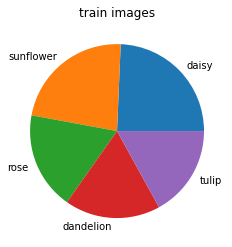

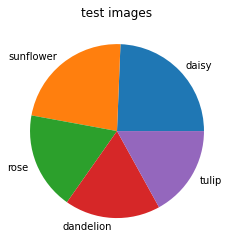

In [25]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values,labels=flowers)
plt.show()

plt.title('test images')
plt.pie(y_test['label'].value_counts().values,labels=flowers)
plt.show()

It is showing that the datas are well mapped and produced.

# Train & Test Data Generation :

Now we need to split the data into train and test and after that we are going to split the target values from the dataframes .

In [26]:
train=pd.concat([y_train,X_train],axis=1)
test=pd.concat([y_test,X_test],axis=1)

After getting our train and test data we are shuffling the data and that'll lead destruction of unnecessary patterns.

In [27]:
train=train.sample(frac=1)
test=test.sample(frac=1)

Let's check how our train data looks.

In [28]:
train.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
695,3.0,0.047059,0.062745,0.015686,0.047059,0.066667,0.011765,0.043137,0.070588,0.012418,0.058170,0.085621,0.029616,0.098039,0.129412,0.068076,0.108681,0.141442,0.073856,0.072345,0.092422,0.040972,0.059375,0.080392,0.022672,0.047059,0.073407,0.018505,0.049877,0.073407,0.019608,0.054902,0.081250,0.022426,0.050980,0.079677,0.018505,0.053799,0.073407,0.018505,...,0.061029,0.079800,0.098489,0.039665,0.081699,0.116340,0.046405,0.126042,0.177880,0.078431,0.124837,0.183190,0.073856,0.098693,0.145935,0.058824,0.094118,0.136397,0.058824,0.114563,0.146201,0.075163,0.149469,0.172161,0.098958,0.157721,0.211213,0.094975,0.133333,0.188419,0.084763,0.164052,0.220057,0.133783,0.165809,0.212868,0.136949,0.156209,0.178636,0.110253
389,3.0,0.182557,0.166871,0.054902,0.204779,0.198039,0.073958,0.228105,0.228105,0.082353,0.250327,0.239869,0.093464,0.262745,0.231373,0.099449,0.258824,0.247712,0.094118,0.247059,0.269935,0.089277,0.254902,0.278431,0.090196,0.265748,0.278431,0.094771,0.280780,0.281699,0.105882,0.283762,0.282353,0.115686,0.297120,0.278431,0.130065,0.301961,0.278431,0.137255,...,0.111765,0.239400,0.248162,0.125490,0.235294,0.244240,0.113725,0.231924,0.251532,0.098039,0.240788,0.263848,0.105882,0.244240,0.266667,0.109804,0.239216,0.266115,0.103370,0.235948,0.247059,0.097120,0.243137,0.239216,0.100388,0.247059,0.227451,0.107843,0.247059,0.221957,0.116544,0.235948,0.208313,0.106352,0.234743,0.179289,0.103370,0.206087,0.148100,0.082353
93,3.0,0.489583,0.541176,0.626838,0.478431,0.537255,0.619608,0.474510,0.537255,0.611765,0.470221,0.536887,0.599632,0.465074,0.533333,0.586642,0.462745,0.533333,0.580392,0.462745,0.529412,0.572426,0.457475,0.524142,0.555515,0.448407,0.515074,0.534681,0.443137,0.509926,0.521691,0.447059,0.509804,0.517647,0.449387,0.509804,0.511397,0.447426,0.506250,0.498407,...,0.189951,0.238480,0.388235,0.131863,0.208578,0.386642,0.096446,0.203922,0.373652,0.100858,0.207843,0.384314,0.109926,0.220956,0.388235,0.136029,0.230025,0.388235,0.163358,0.239093,0.395956,0.160784,0.250980,0.403922,0.168627,0.271324,0.422672,0.177206,0.286275,0.450613,0.184681,0.277574,0.449265,0.155147,0.248652,0.415196,0.129167,0.209069,0.373775,0.084804
503,1.0,0.137377,0.114461,0.020833,0.203676,0.220956,0.013848,0.194730,0.117402,0.014828,0.219608,0.039216,0.019608,0.295466,0.074877,0.082108,0.659559,0.302696,0.387868,0.510907,0.227574,0.281863,0.552328,0.043382,0.085294,0.620833,0.129167,0.176225,0.635172,0.098407,0.157230,0.742157,0.270956,0.255882,0.764706,0.333946,0.302574,0.756250,0.677206,0.696446,...,0.458456,0.584681,0.557598,0.534436,0.588235,0.572549,0.558456,0.581495,0.579289,0.582108,0.571814,0.579779,0.623775,0.556985,0.558211,0.627328,0.559436,0.543750,0.595956,0.615074,0.611029,0.669730,0.537868,0.525000,0.583824,0.511397,0.491789,0.559191,0.470588,0.470221,0.545098,0.582230,0.571324,0.632721,0.476348,0.476348,0.572549,0.476348,0.483578,0.607843
29,3.0,0.144610,0.152941,0.098039,0.149020,0.156863,0.106373,0.145098,0.146895,0.117647,0.131180,0.133497,0.113725,0.112255,0.116176,0.100490,0.079248,0.080923,0.074510,0.060498,0.062277,0.054434,0.066667,0.066667,0.057353,0.086368,0.086368,0.072905,0.094118,0.090196,0.074510,0.086765,0.086275,0.070588,0.077288,0.074510,0.062745,0.073855,0.074510,0.065523,...,0.000000,0.569650,0.566873,0.054495,0.401595,0.414503,0.120507,0.759916,0.766294,0.013521,0.791495,0.794649,0.000000,0.764706,0.766311,0.001605,0.710662,0.715426,0.016314,0.739275,0.754962,0.015686,0.743342,0.765196,0.016154,0.478906,0.504682,0.030540,0.749808,0.765424,0.007843,0.362377,0.371128,0.039338,0.099995,0.098529,0.074020,0.109804,0.105882,0.086275


### X and Y preparation :

Now we are preparing X_train,y_train,X_test and y_test which will be feeded after some processes.

In [29]:
X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In NN model we have to feed a numpy array which will be a better approch to generate tensors in the model.

In [30]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [31]:
type(y_train[0]),type(y_test[0])

(numpy.float64, numpy.float64)

As this values are in float datatype this will not work in our NN model. So we have to make those values integers by changing their datatypes into **int_64** .

In [32]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

As we have to find the answers for general people also we are using the flowers array as a decoder as the name of the flowers has been encoded.

In [33]:
decoder=flowers

As the images are flattened we have to reshape them for visualization.

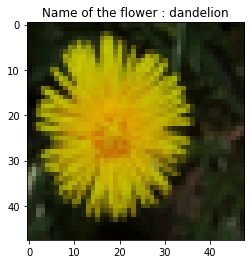

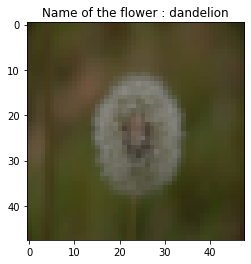

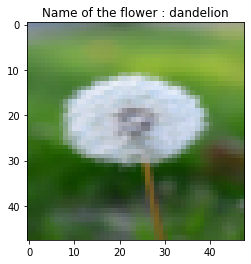

In [34]:
for i in range(3):
  plt.title('Name of the flower : '+decoder[y_train[i]])
  plt.imshow(X_train[i].reshape(48,48,3))
  plt.show()


In [35]:
X_train.shape,X_test.shape

((3457, 6912), (866, 6912))

#### Reshaping :
Now we are reshaping the train and test data as we are going to feed in into convolutional neural nets.

In [36]:
X_train=X_train.reshape(3457,48,48,3)
X_test=X_test.reshape(866,48,48,3)
y_train=y_train.reshape(3457,1)
y_test=y_test.reshape(866,1)

This reshaping of data has bcreated a 4-d dataset. When it will be fitted into the neural network it will convert into 4d tensors which will lead the prediction.

 For further understanding of tensors you can search it in [here](https://deeplizard.com/learn/video/Csa5R12jYRg) .

# Model Generation :

As we've build our data we are going to build our model .
Out there , there are several very popular image classification models ,like -

[Inception V3](https://cloud.google.com/tpu/docs/inception-v3-advanced)

[ResNet](https://d2l.ai/chapter_convolutional-modern/resnet.html)

[MobileNet](https://keras.io/api/applications/mobilenet/)

But in here we are going to build our custom model cause that should be **the habit** of any DL learnee or DL professional.
Our model will have several layers of Dense and ConvNet over a sequential framework.

In [37]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

After making the model let's see the summary of the model.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

Now we are compiling our model with custom metrics .

We are using -
1. Optimizer ---> Adam (default)
2. Loss      ---> Sparse Categorical Crossentropy
3. Metrics   ---> Accuracy

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

And now we've reached the most inetresting part of our whole project -**MODEL FITTING**.
we are going to declare the batch size as 10 which will be convinient to the model's accuracy and time.
We are using 7 epochs to train the model and we are using the test data as validation
and after all we are also putting the verbose on as we can see how the NN model progresses.

We are going to store this fitting into a variable **hist** so we can see how the model performed and find if the model is overfitting or underfitting or has very much bias or not.

In [40]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=7,verbose=1,validation_data=(X_test,y_test))

Epoch 1/7
346/346 [==============================] - 69s 196ms/step - loss: 1.4158 - accuracy: 0.4116 - val_loss: 1.1796 - val_accuracy: 0.5404
Epoch 2/7
346/346 [==============================] - 67s 194ms/step - loss: 0.9985 - accuracy: 0.6099 - val_loss: 1.1585 - val_accuracy: 0.5242
Epoch 3/7
346/346 [==============================] - 67s 194ms/step - loss: 0.8387 - accuracy: 0.6900 - val_loss: 1.1428 - val_accuracy: 0.5878
Epoch 4/7
346/346 [==============================] - 67s 193ms/step - loss: 0.5477 - accuracy: 0.7992 - val_loss: 1.3328 - val_accuracy: 0.5370
Epoch 5/7
346/346 [==============================] - 69s 199ms/step - loss: 0.3630 - accuracy: 0.8779 - val_loss: 1.3344 - val_accuracy: 0.5554
Epoch 6/7
346/346 [==============================] - 67s 195ms/step - loss: 0.2381 - accuracy: 0.9262 - val_loss: 1.8009 - val_accuracy: 0.5485
Epoch 7/7
346/346 [==============================] - 68s 197ms/step - loss: 0.1884 - accuracy: 0.9377 - val_loss: 2.1343 - val_accuracy:

Now we are checking the models performance by plotting.

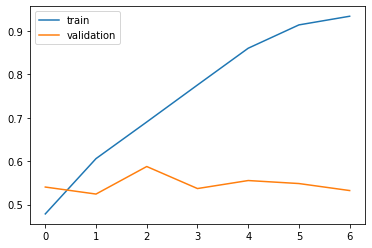

In [41]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

After visualizing the plot we can say model is best tuned in between 2nd and 3rd epochs then the model starts getting overfitted with the train data.
So, best tuned model gives 60% accuracy over validaion data.

Now we are going to predict over the test data and make the confusion matrix and make conclusions.

In [42]:
y_pred=model.predict(X_test)

In [45]:
type(y_pred)

numpy.ndarray

As the model produces prediction as tensors we have to find the actual prediction with the **numpy** function **argmax** **(numpy.argmax)**.

### prediction tensors ---> np.argmax() ---> prediction ---> decoders ---> actual predictions

In [43]:
y_final=[]
for i in range(len(y_pred)):
  y_final.append(np.argmax(y_pred[i]))
type(y_final[0])

numpy.int64

Now we are going to form the final confusion matrix. and see how the model worked on the test data.

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffa1b5cf438>)

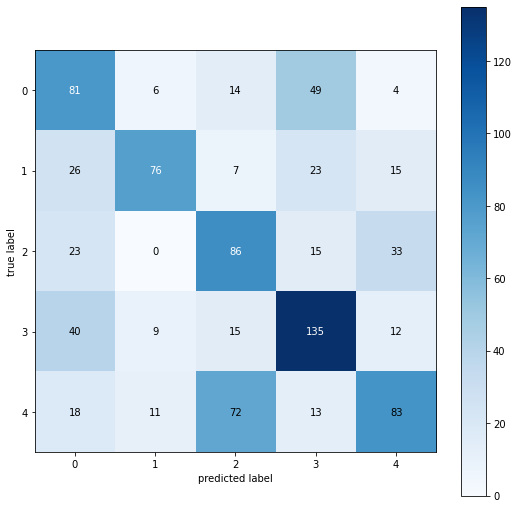

In [44]:
mat=confusion_matrix(y_test,y_final)
plot_confusion_matrix(mat,figsize=(9,9),colorbar=True)

In this confuson matrix we can see that the model has predicted better that 50% of the data, still it has some wrong values .
and the wrong prediction of rose into tulip and of daisy into dandelion are very dominant.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuks0CwWsbaQBedosJzGu9LG9HY7frVIZRUQ&usqp=CAU)

After searching the web for a looong time (XD) I found some explanations about those mispredictions.
Those are -

1. Rose and Tulips are Perennial in formation and their colours resemble in a very good probabilty.
2. Dandelion and Daisy are both lawn flowers, so the background is ought to be with green grasses.They also has long stalk so can be mispredicted even when the model is very good at predictions.
3. Dandelions are actually resembles the colour of daisy having green background in some and long stalks creating mispredictions over all flower types.

**Hurrah ! we've completed a whole project of flower/image classification.The detailed explanantion will definitely help others to understand each code and work similar.**

Thank You :)
You can visit my other works at [kaggle](https://kaggle.com/sagnik1511/notebooks) or in [github](https://github.com/sagnik1511?tab=repositories) .

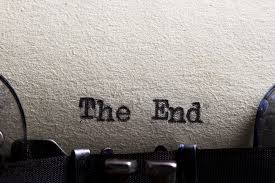